In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
prepath = 'parflow-melissa-da/test/2'

In [10]:
sim_all = [pd.read_csv(prepath + '/simulation-all.csv.4runners.9members.%d' % i) for i in range(4)]
flatten = lambda l: [item for sublist in l for item in sublist]
propagation_times = flatten([sim['compute walltime (ms)'] for sim in sim_all])
propagation_times

[986.1060000000001,
 1134.86,
 1147.35,
 619.4019999999999,
 201.667,
 125.146,
 195.62900000000002,
 126.24700000000001,
 155.384,
 93.0555,
 90.4943,
 139.566,
 93.6284,
 93.9249,
 117.939,
 55.8379,
 143.304,
 77.6064,
 161.025,
 69.57,
 143.333,
 71.8267,
 67.8992,
 146.15200000000002,
 71.5184,
 121.845,
 80.5302,
 145.66899999999998,
 81.4,
 68.1217,
 146.974,
 80.8462,
 146.886,
 80.7711,
 128.716,
 101.417,
 164.625,
 90.9882,
 188.405,
 86.5681,
 153.981,
 83.2895,
 147.93,
 98.2621,
 156.11,
 72.9363,
 135.82399999999998,
 77.7034,
 126.77600000000001,
 76.9161,
 58.5735,
 116.54899999999999,
 64.2514,
 51.4829,
 131.02,
 78.363,
 133.667,
 81.1506,
 143.093,
 72.9105,
 141.032,
 75.5201,
 138.345,
 81.4295,
 133.119,
 82.5295,
 52.3791,
 151.185,
 79.2895,
 138.173,
 79.5879,
 144.92,
 81.468,
 133.947,
 54.158,
 68.6444,
 128.658,
 77.3971,
 147.465,
 61.8546,
 54.1778,
 127.939,
 82.1602,
 148.81,
 78.6001,
 147.285,
 83.3308,
 169.483,
 113.70200000000001,
 153.49,
 82.96

In [6]:
sim_all[0]

,iteration,timesteps,compute walltime (ms),idle walltime (ms),idle + compute walltime(ms)
0,0,1,986.1060,0.000000,986.1060
1,1,2,1134.8600,0.620617,1135.4800
2,2,2,1147.3500,0.445576,1147.8000
3,3,2,619.4020,0.515694,619.9180
4,4,2,201.6670,1278.780000,1480.4500
...,...,...,...,...,...
197,197,2,55.6108,0.603795,56.2145
198,198,2,119.7700,26.681900,146.4520
199,199,2,88.2626,0.613940,88.8765
200,200,2,131.8870,80.697400,212.5840


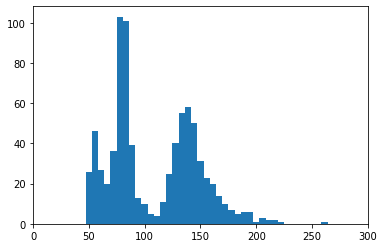

In [17]:
plt.hist(propagation_times, bins=400)
plt.xlim([0,300])   # there is nothing important after 300 ms...
plt.show()

ahh nice so some took one parflow iteration and some took 2 iterations(time splitting) to propagate (this corresponds nicely with the kinsol solver logs)

So we can do some statsitics with this disteibution to know what we can expect for the slacktime improvement? --> yes we could but all the one iteration propagations seem to happen in the same timestep and so do the 2 iteration timesteps. **This only gives a general idea. The most models when drawing runtimes from this distribution will probably overestimate the positive effect of melissa-da on the runtime. (again due to corellation of the walltime needed for propagation of members belonging to one assimilation window**